# Model Training
This script is used for training the LightGBM model. All feature engineering was done previously in SAS.

In [ ]:
import numpy as np
import lightgbm as lgbm
import pandas as pd
import os

In [3]:
'''
File paths
'''
folder = os.path.join("/projectnb","cs542sp","netflix_wrw2", "CS542-final-project", "data")

In [7]:
from sklearn.model_selection import train_test_split

def process_data(data):
    
    data = data.dropna()
    
    for c in data.columns:
        data.loc[:,c] = pd.to_numeric(data.loc[:,c], downcast="unsigned")

    data.info()
    
    X = data.drop(['User_ID','Movie_ID', 'Rated'], axis=1)
    Y = data.loc[:,"Rated"]

    X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.25, random_state = 0)
    
    return X_train, X_valid, y_train, y_valid


In [4]:
%%time

# load and train the models in chunks
# for testing:
#  - 5 models
#  - 10M instances

reader = pd.read_sas('netflix_analysis_dataset2.sas7bdat', chunksize=20_000_000)
data = next(reader)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   User_ID                 float64
 1   Movie_ID                float64
 2   Year                    float64
 3   Rated                   float64
 4   Ratings_for_Movie       float64
 5   Ratings_for_Movie_2005  float64
 6   Netflix_Release_Year    float64
 7   Movie_Rating_Time       float64
 8   Movie_Ratings_per_Day   float64
 9   Release_Year            float64
 10  AVG_Rating_for_Movie    float64
 11  Ratings_from_User       float64
 12  Ratings_from_User_2005  float64
 13  AVG_Rating_from_User    float64
 14  User_Rating_Time        float64
 15  User_Ratings_per_Day    float64
 16  User_Entry_Year         float64
dtypes: float64(17)
memory usage: 1.3 GB
CPU times: user 17.5 s, sys: 2.17 s, total: 19.6 s
Wall time: 19.8 s


In [ ]:
X_train, X_valid, y_train, y_valid = process_data(data)

### Note the number of threads should be set to the number of CPUs available for training.

In [11]:
%%time

'''
Set the data
'''
train_data = lgbm.Dataset(X_train, label=y_train)
valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data)

'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 2047,
    "max_depth": 12,
    "learning_rate": 0.1,
    "bagging_fraction": 0.5,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": 8,
    "boosting": "gbdt",
    "verbose": -1
}

model = lgbm.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[valid_set],
    early_stopping_rounds = 10,
    verbose_eval = 50,
)

[LightGBM] [Info] Number of positive: 3051094, number of negative: 4358616
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 7409710, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.411770 -> initscore=-0.356654
[LightGBM] [Info] Start training from score -0.356654
[1]	valid_0's binary_logloss: 0.669364
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.662702
[3]	valid_0's binary_logloss: 0.657165
[4]	valid_0's binary_logloss: 0.652449
[5]	valid_0's binary_logloss: 0.64854
[6]	valid_0's binary_logloss: 0.645161
[7]	valid_0's binary_logloss: 0.642289
[8]	valid_0's binary_logloss: 0.639764
[9]	valid_0's binary_logloss: 0.637635
[10]	valid_0's binary_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[96]	valid_0's binary_logloss: 0.606501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[97]	valid_0's binary_logloss: 0.606401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[98]	valid_0's binary_logloss: 0.60621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[99]	valid_0's binary_logloss: 0.60609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[100]	valid_0's binary_logloss: 0.60602
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[101]	valid_0's binary_logloss: 0.605869
[102]	valid_0's binary_logloss: 0.605708
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[103]	valid_0's binary_logloss: 0.605505
[104]	valid_0's binary_logloss: 0.605395
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[105]	valid_0's binary_logloss: 0.6052

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[170]	valid_0's binary_logloss: 0.598737
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[171]	valid_0's binary_logloss: 0.598677
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[172]	valid_0's binary_logloss: 0.598594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[173]	valid_0's binary_logloss: 0.598495
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[174]	valid_0's binary_logloss: 0.598437
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[175]	valid_0's binary_logloss: 0.598393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[176]	valid_0's binary_logloss: 0.59833
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[177]	valid_0's binary_logloss: 0.598256
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[241]	valid_0's binary_logloss: 0.593561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[242]	valid_0's binary_logloss: 0.593474
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[243]	valid_0's binary_logloss: 0.593382
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[244]	valid_0's binary_logloss: 0.593316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[245]	valid_0's binary_logloss: 0.593232
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[246]	valid_0's binary_logloss: 0.593102
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[247]	valid_0's binary_logloss: 0.592998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[248]	valid_0's binary_logloss: 0.592892
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[315]	valid_0's binary_logloss: 0.589617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[316]	valid_0's binary_logloss: 0.589574
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[317]	valid_0's binary_logloss: 0.589542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[318]	valid_0's binary_logloss: 0.589498
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[319]	valid_0's binary_logloss: 0.589479
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[320]	valid_0's binary_logloss: 0.589445
[321]	valid_0's binary_logloss: 0.589349
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[322]	valid_0's binary_logloss: 0.589316
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[323]	valid_0's binary_logloss: 0.589225
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[387]	valid_0's binary_logloss: 0.586527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[388]	valid_0's binary_logloss: 0.586488
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[389]	valid_0's binary_logloss: 0.586485
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[390]	valid_0's binary_logloss: 0.586455
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[391]	valid_0's binary_logloss: 0.586414
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[392]	valid_0's binary_logloss: 0.586393
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[393]	valid_0's binary_logloss: 0.586371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[394]	valid_0's binary_logloss: 0.586351
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[460]	valid_0's binary_logloss: 0.58356
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[461]	valid_0's binary_logloss: 0.583536
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[462]	valid_0's binary_logloss: 0.583524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[463]	valid_0's binary_logloss: 0.583506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[464]	valid_0's binary_logloss: 0.583493
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[465]	valid_0's binary_logloss: 0.583486
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[466]	valid_0's binary_logloss: 0.583429
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[467]	valid_0's binary_logloss: 0.583383
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[533]	valid_0's binary_logloss: 0.581633
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[534]	valid_0's binary_logloss: 0.581604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[535]	valid_0's binary_logloss: 0.581576
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[536]	valid_0's binary_logloss: 0.581544
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[537]	valid_0's binary_logloss: 0.581505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[538]	valid_0's binary_logloss: 0.581464
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[539]	valid_0's binary_logloss: 0.581435
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[540]	valid_0's binary_logloss: 0.581412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[541]	valid_0's binary_logloss: 0.581378
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[606]	valid_0's binary_logloss: 0.579412
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[607]	valid_0's binary_logloss: 0.579404
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[608]	valid_0's binary_logloss: 0.579398
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[609]	valid_0's binary_logloss: 0.579369
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[610]	valid_0's binary_logloss: 0.579336
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[611]	valid_0's binary_logloss: 0.579321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[612]	valid_0's binary_logloss: 0.579315
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[613]	valid_0's binary_logloss: 0.579291
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[678]	valid_0's binary_logloss: 0.577929
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[679]	valid_0's binary_logloss: 0.5779
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[680]	valid_0's binary_logloss: 0.577883
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[681]	valid_0's binary_logloss: 0.577864
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[682]	valid_0's binary_logloss: 0.577865
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[683]	valid_0's binary_logloss: 0.577857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[684]	valid_0's binary_logloss: 0.577848
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[685]	valid_0's binary_logloss: 0.577844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[750]	valid_0's binary_logloss: 0.57668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[751]	valid_0's binary_logloss: 0.576655
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[752]	valid_0's binary_logloss: 0.576622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[753]	valid_0's binary_logloss: 0.576591
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[754]	valid_0's binary_logloss: 0.576558
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[755]	valid_0's binary_logloss: 0.576539
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[756]	valid_0's binary_logloss: 0.576505
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[757]	valid_0's binary_logloss: 0.57645
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[824]	valid_0's binary_logloss: 0.575101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[825]	valid_0's binary_logloss: 0.575073
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[826]	valid_0's binary_logloss: 0.57506
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[827]	valid_0's binary_logloss: 0.575046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[828]	valid_0's binary_logloss: 0.575036
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[829]	valid_0's binary_logloss: 0.575021
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[830]	valid_0's binary_logloss: 0.575014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[831]	valid_0's binary_logloss: 0.574997
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[897]	valid_0's binary_logloss: 0.573802
[898]	valid_0's binary_logloss: 0.573788
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[899]	valid_0's binary_logloss: 0.573772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[900]	valid_0's binary_logloss: 0.573767
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[901]	valid_0's binary_logloss: 0.57376
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[902]	valid_0's binary_logloss: 0.573746
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[903]	valid_0's binary_logloss: 0.573721
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[904]	valid_0's binary_logloss: 0.573716
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[905]	valid_0's binary_logloss: 0.573703
[LightGBM] [Warning] No further 

[972]	valid_0's binary_logloss: 0.572664
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[973]	valid_0's binary_logloss: 0.572644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[974]	valid_0's binary_logloss: 0.572627
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[975]	valid_0's binary_logloss: 0.572612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[976]	valid_0's binary_logloss: 0.572598
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[977]	valid_0's binary_logloss: 0.57259
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[978]	valid_0's binary_logloss: 0.57258
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[979]	valid_0's binary_logloss: 0.572572
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[980]	valid_0's binary_logloss: 0.572565
[LightGBM] [Warning] No further s

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

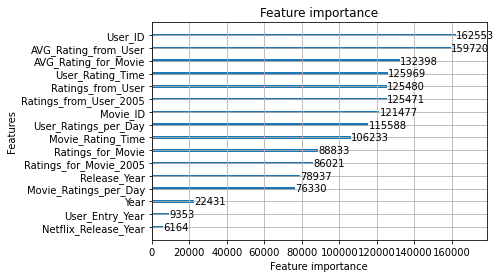

In [12]:
lgbm.plot_importance(model)

In [38]:
from sklearn.metrics import accuracy_score


def evaluate(model, X_train, X_valid, y_train, y_valid, num = 1_000_000):
    
    train_index = y_train.sample(num).index
    test_index = y_valid.sample(num).index
    
    train_prediction = model.predict(X_train.loc[train_index])
    valid_prediction = model.predict(X_valid.loc[test_index])
    
    train = accuracy_score(y_train.loc[train_index], train_prediction > 0.5)
    test = accuracy_score(y_valid.loc[test_index], valid_prediction > 0.5)
    
    '''
    Check for overfitting
    '''
    print('\tTrain score:\t{:.3f}'.format(train))
    print('\tTest score:\t{:.3f}'.format(test))
    
    return train, test

In [32]:
evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)

Overfit check:
Train score:	0.769
Test score:	0.695


This implies the model is overfit to the data. The model therefore should be trained with:
 - more data
 - change hyperparameters

In [16]:
'''
Metrics output
'''
from sklearn.metrics import classification_report
print(classification_report(y_valid, valid_prediction > 0.5))

              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76   1453609
         1.0       0.66      0.53      0.59   1016295

    accuracy                           0.70   2469904
   macro avg       0.69      0.67      0.67   2469904
weighted avg       0.69      0.70      0.69   2469904



In [17]:
model.save_model('models/m1000_002.txt')

To get an idea of how the data is overfit, the model is iteratively tested on the training depth. Theoretically this could be used to determine to when to halt the training if the validation is not improving.

In [44]:
%%time

'''
Set the data
'''
train_data = lgbm.Dataset(X_train, label=y_train, free_raw_data = False)
valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data, free_raw_data = False)

'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 2047,
    "max_depth": 12,
    "learning_rate": 0.1,
    "bagging_fraction": 0.5,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": 8,
    "boosting": "gbdt",
    "verbose":-1
}

# separate iterations into chunks up to 500
iterations = [9,15,25,50,50,50,50,50,50,50,50,50]

print("Start Training")

model = lgbm.train(
    params,
    train_data,
    num_boost_round=1,
    valid_sets=[valid_set],
    early_stopping_rounds = 10,
    verbose_eval = False,
)

print("Model - iterations: {}".format(1))

acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)

train = []
test = []

train.append(acc_t)
test.append(acc_v)

current = 1

print()

for i in iterations:
    
    current += i
    
    model = lgbm.train(
        params,
        train_data,
        num_boost_round=i,
        valid_sets=[valid_set],
        early_stopping_rounds = 10,
        verbose_eval = False,
        init_model = model
    )
    
    print("Model - iterations: {}".format(current))
    
    acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)
    
    train.append(acc_t)
    test.append(acc_v)
    
    print()

Start Training
Model - iterations: 1
	Train score:	0.590
	Test score:	0.582

Model - iterations: 10
	Train score:	0.640
	Test score:	0.639

Model - iterations: 25
	Train score:	0.649
	Test score:	0.655

Model - iterations: 50
	Train score:	0.664
	Test score:	0.656

Model - iterations: 100
	Train score:	0.674
	Test score:	0.664

Model - iterations: 150
	Train score:	0.686
	Test score:	0.677

Model - iterations: 200
	Train score:	0.700
	Test score:	0.675

Model - iterations: 250
	Train score:	0.705
	Test score:	0.677

Model - iterations: 300
	Train score:	0.704
	Test score:	0.681

Model - iterations: 350
	Train score:	0.713
	Test score:	0.685

Model - iterations: 400
	Train score:	0.719
	Test score:	0.679

Model - iterations: 450
	Train score:	0.717
	Test score:	0.685

Model - iterations: 500
	Train score:	0.728
	Test score:	0.687

Model - iterations: 550
	Train score:	0.730
	Test score:	0.689



KeyboardInterrupt: 

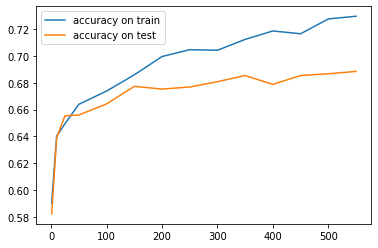

In [51]:
from matplotlib import pyplot


current = [1]

for i in iterations:
    current.append(current[-1]+i)

# plot the overfitting
pyplot.plot(current[0:len(train)], train, label="accuracy on train")
pyplot.plot(current[0:len(test)], test, label="accuracy on test")

pyplot.legend()
pyplot.show()

### New tests
Using the data above, the model can hopefully be improved using more data. Instead of 10M rows, the model will be trained on 25M rows.

To decrease overfitting, these changes will be made to the parameters:
 - num_leaves ~ decrease
 - add min_data_in_leaf
 - set feature_fraction to < 1 ~ enables feature subsampling
 
 Hopefully these parameter changes avoid overfitting and push for early convergence.

In [52]:
%%time

import time

'''
Read 25M lines of data
'''

start = time.time()

reader = pd.read_sas('netflix_analysis_dataset2.sas7bdat', chunksize=25_000_000)
data = next(reader)
X_train, X_valid, y_train, y_valid = process_data(data)

print("Data processed: {}".format(time.time()-start))

'''
Set the data
'''
train_data = lgbm.Dataset(X_train, label=y_train, free_raw_data = False)
valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data, free_raw_data = False)

'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 1023,
    "max_depth": 12,
    "learning_rate": 0.1,
    "bagging_fraction": 0.5,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": 8,
    "boosting": "gbdt",
    "feature_fraction":0.8,
    "min_data_in_leaf":1000,
    "verbose":-1
}

# separate iterations into chunks up to 250
iterations = [9,15,25,50,50,50,50]

print("Start Training")

model = lgbm.train(
    params,
    train_data,
    num_boost_round=1,
    valid_sets=[valid_set],
    early_stopping_rounds = 10,
    verbose_eval = False,
)

print("Model - iterations: {}".format(1))

acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)

train = []
test = []

train.append(acc_t)
test.append(acc_v)

current = 1

print()

for i in iterations:
    
    current += i
    
    model = lgbm.train(
        params,
        train_data,
        num_boost_round=i,
        valid_sets=[valid_set],
        early_stopping_rounds = 10,
        verbose_eval = False,
        init_model = model
    )
    
    print("Model - iterations: {}".format(current))
    
    acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=50_000)
    
    train.append(acc_t)
    test.append(acc_v)
    
    print()

Start Training
Model - iterations: 1
	Train score:	0.594
	Test score:	0.581

Model - iterations: 10
	Train score:	0.630
	Test score:	0.632

Model - iterations: 25
	Train score:	0.646
	Test score:	0.640

Model - iterations: 50
	Train score:	0.649
	Test score:	0.648

Model - iterations: 100
	Train score:	0.653
	Test score:	0.654

Model - iterations: 150
	Train score:	0.659
	Test score:	0.654

Model - iterations: 200
	Train score:	0.659
	Test score:	0.653

Model - iterations: 250
	Train score:	0.660
	Test score:	0.655

CPU times: user 1h 2min 1s, sys: 1min 39s, total: 1h 3min 40s
Wall time: 10min 9s


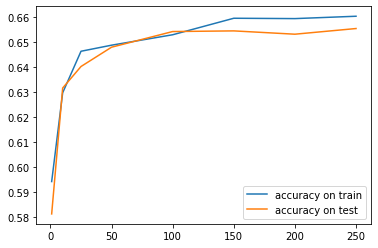

In [53]:
current = [1]

for i in iterations:
    current.append(current[-1]+i)

# plot the overfitting
pyplot.plot(current[0:len(train)], train, label="accuracy on train")
pyplot.plot(current[0:len(test)], test, label="accuracy on test")

pyplot.legend()
pyplot.show()

The model is now underfit. Perhaps the anti-overfitting parameters were too strong. 

Next try is to lower the effect of the parameters and increase the number of leafs. 

In [54]:
%%time

import time

'''
Read 25M lines of data
'''

start = time.time()

reader = pd.read_sas('netflix_analysis_dataset2.sas7bdat', chunksize=25_000_000)
data = next(reader)
X_train, X_valid, y_train, y_valid = process_data(data)

print("Data processed: {}s".format(time.time()-start))

'''
Set the data
'''
train_data = lgbm.Dataset(X_train, label=y_train, free_raw_data = False)
valid_set = lgbm.Dataset(X_valid, label=y_valid, reference=train_data, free_raw_data = False)

'''
Set the parameters
'''
params = {
    "objective":'binary',
    "num_leaves": 2047,
    "max_depth": 12,
    "learning_rate": 0.1,
    "bagging_fraction": 0.7,
    "bagging_freq": 5,
    "metric":"binary_logloss",
    "num_threads": 8,
    "boosting": "gbdt",
    "min_data_in_leaf":200,
    "verbose":-1
}

# separate iterations into chunks up to 250
iterations = [9,15,25,50,50,50,50]

print("Start Training")

model = lgbm.train(
    params,
    train_data,
    num_boost_round=1,
    valid_sets=[valid_set],
    early_stopping_rounds = 10,
    verbose_eval = False,
)

print("Model - iterations: {}".format(1))

acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=10_000)

train = []
test = []

train.append(acc_t)
test.append(acc_v)

current = 1

print()

for i in iterations:
    
    current += i
    
    model = lgbm.train(
        params,
        train_data,
        num_boost_round=i,
        valid_sets=[valid_set],
        early_stopping_rounds = 10,
        verbose_eval = False,
        init_model = model
    )
    
    print("Model - iterations: {}".format(current))
    
    acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=50_000)
    
    train.append(acc_t)
    test.append(acc_v)
    
    print()

Data processed: 65.5232675075531
Start Training
Model - iterations: 1
	Train score:	0.590
	Test score:	0.588

Model - iterations: 10
	Train score:	0.637
	Test score:	0.633

Model - iterations: 25
	Train score:	0.648
	Test score:	0.646

Model - iterations: 50
	Train score:	0.653
	Test score:	0.649

Model - iterations: 100
	Train score:	0.662
	Test score:	0.655

Model - iterations: 150
	Train score:	0.667
	Test score:	0.659

Model - iterations: 200
	Train score:	0.669
	Test score:	0.663

Model - iterations: 250
	Train score:	0.675
	Test score:	0.664

CPU times: user 1h 12min, sys: 1min 56s, total: 1h 13min 57s
Wall time: 11min 32s


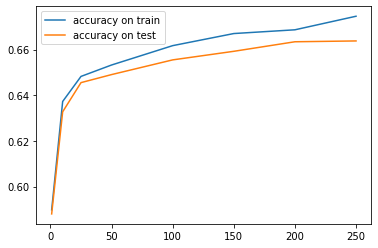

In [55]:
current = [1]

for i in iterations:
    current.append(current[-1]+i)

# plot the overfitting
pyplot.plot(current[0:len(train)], train, label="accuracy on train")
pyplot.plot(current[0:len(test)], test, label="accuracy on test")

pyplot.legend()
pyplot.show()

In [56]:
model.save_model('models/m25M_250.txt')

In [61]:
current = 250

# continue training the model (10 rounds of 50 training rounds)
for i in range(5):
        
    current += 50
    
    model = lgbm.train(
        params,
        train_data,
        num_boost_round=50,
        valid_sets=[valid_set],
        early_stopping_rounds = 10,
        verbose_eval = False,
        init_model = model
    )
    
    print("Model - iterations: {}".format(current))
    
    acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=50_000)
    
    train.append(acc_t)
    test.append(acc_v)

KeyboardInterrupt: 

In [60]:
acc_t, acc_v = evaluate(model,X_train, X_valid, y_train, y_valid, num=50_000)
model.save_model('m25M_400.txt')

	Train score:	0.685
	Test score:	0.674
